<a href="https://colab.research.google.com/github/deenaseban/machine-learning/blob/main/Collision_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**VEHICLE COLLISION SEVERITY PREDICTION**
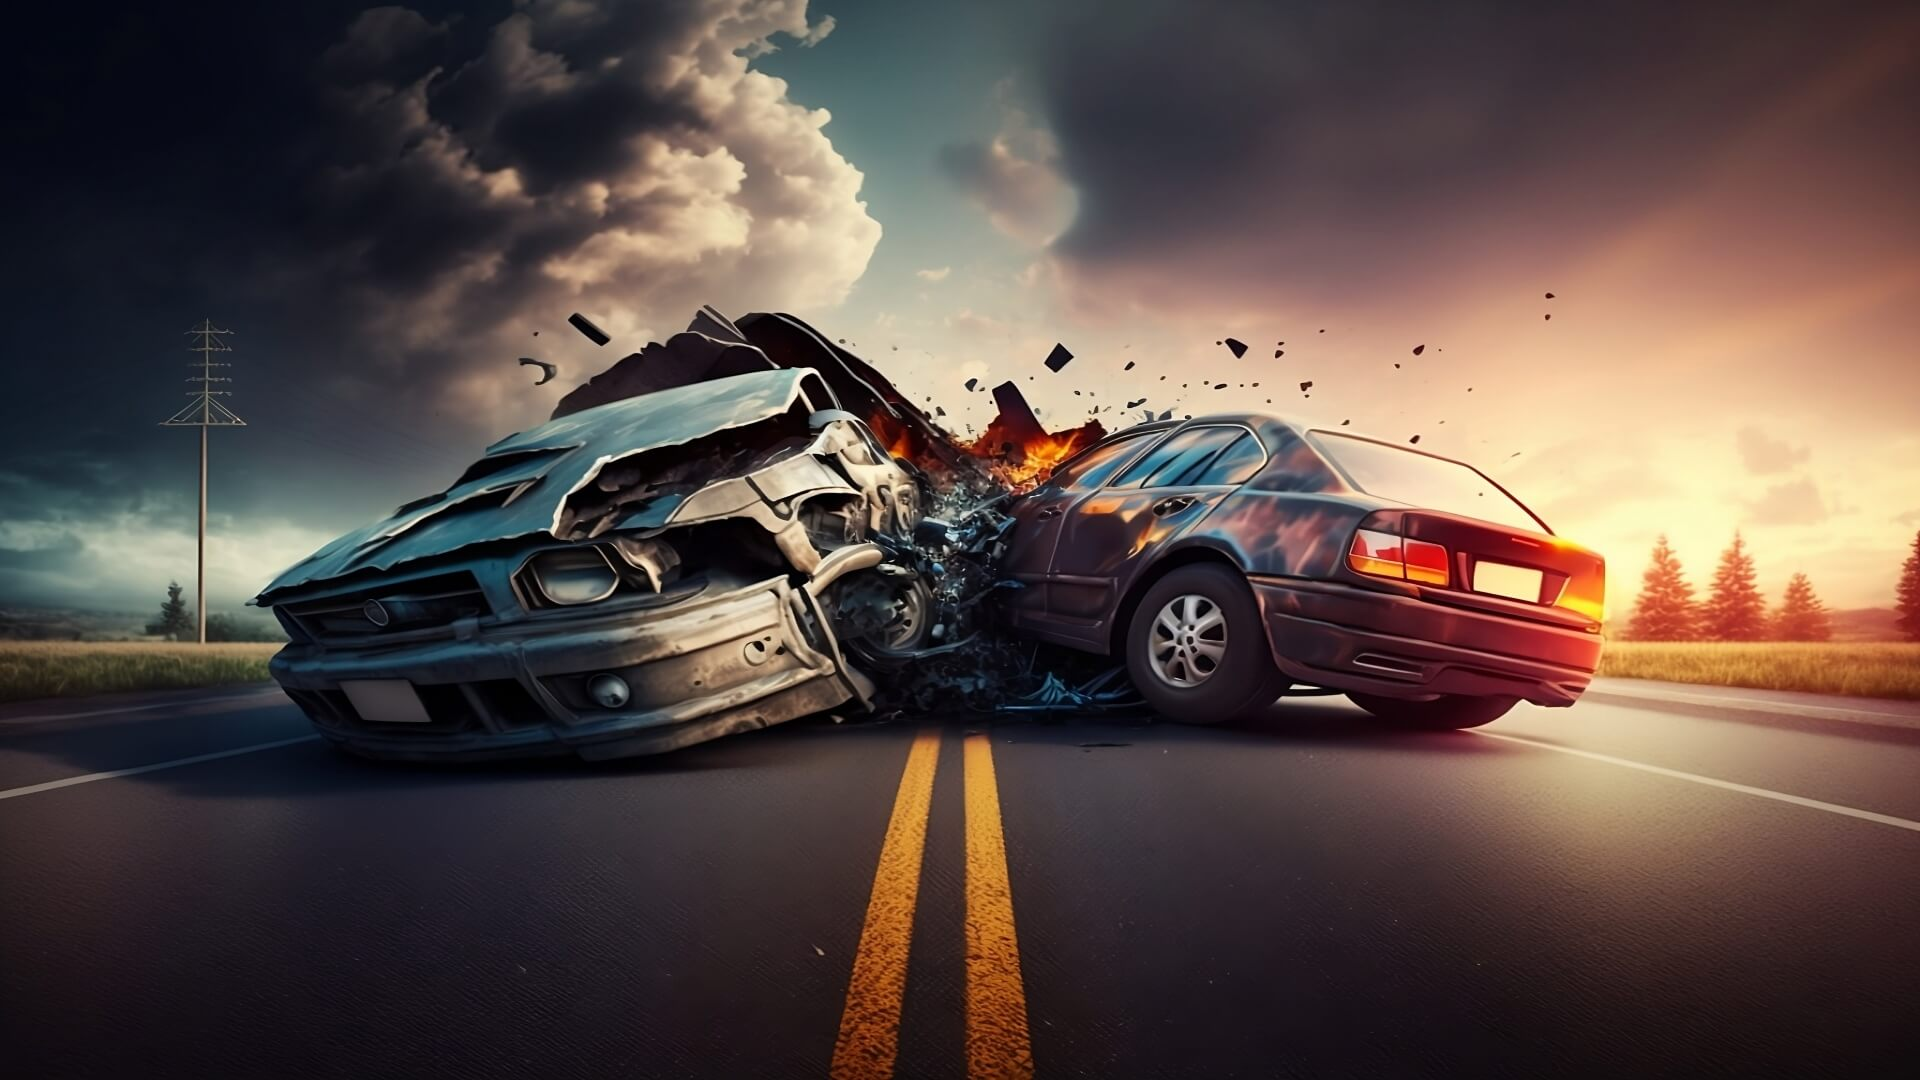

#IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#LOADING DATA SET

In [ ]:
df=pd.read_csv('/content/seattle_collision_data_2005_2019.csv')
df.head()

,Unnamed: 0,longitude,latitude,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,response_type,response_time,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WSF5
0,1,-122.324322,47.613755,0,Parked Car,2,0,0,2,0,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0
1,2,-122.321556,47.571558,0,Rear Ended,3,0,0,3,0,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0
2,3,-122.344164,47.555769,1,Head On,2,0,0,2,1,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0
3,4,-122.309400,47.608484,1,Rear Ended,2,0,0,2,1,...,Motor Vehicle Accident,36.0,9.4,0.0,NaN,NaN,33.0,38,27,17.0
4,5,-122.319746,47.674521,0,Left Turn,2,0,0,2,0,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'longitude', 'latitude', 'SEVERITYCODE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'JUNCTIONTYPE', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING',
       'HITPARKEDCAR', 'SPDCASENO', 'DATE', 'TIME', 'intersection_related',
       'response_type', 'response_time', 'AWND', 'PRCP', 'SNOW', 'SNWD',
       'TAVG', 'TMAX', 'TMIN', 'WSF5'],
      dtype='object')

In [ ]:
df.shape

(111882, 34)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111882 entries, 0 to 111881
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            111882 non-null  int64  
 1   longitude             111882 non-null  float64
 2   latitude              111882 non-null  float64
 3   SEVERITYCODE          111882 non-null  int64  
 4   COLLISIONTYPE         111882 non-null  object 
 5   PERSONCOUNT           111882 non-null  int64  
 6   PEDCOUNT              111882 non-null  int64  
 7   PEDCYLCOUNT           111882 non-null  int64  
 8   VEHCOUNT              111882 non-null  int64  
 9   INJURIES              111882 non-null  int64  
 10  SERIOUSINJURIES       111882 non-null  int64  
 11  FATALITIES            111882 non-null  int64  
 12  JUNCTIONTYPE          111882 non-null  object 
 13  INATTENTIONIND        111882 non-null  bool   
 14  UNDERINFL             111882 non-null  bool   
 15  

In [ ]:
df.describe()

,Unnamed: 0,longitude,latitude,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,...,TIME,response_time,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WSF5
count,111882.000000,111882.000000,111882.000000,111882.000000,111882.000000,111882.000000,111882.000000,111882.000000,111882.000000,111882.000000,...,111882.000000,15053.000000,111882.000000,111882.000000,84815.000000,84815.000000,111882.000000,111882.000000,111882.000000,110524.000000
mean,55941.500000,-122.335152,47.618769,0.377112,2.720947,0.056998,0.041758,2.037754,0.478611,0.018814,...,13.908235,8.723045,7.616091,0.128609,0.014936,0.020045,53.502132,61.162466,46.358011,21.543392
std,32297.695746,0.027573,0.055533,0.528408,1.352413,0.243901,0.201817,0.554246,0.813953,0.190153,...,5.430913,12.443095,3.065175,0.267593,0.207814,0.250879,10.519442,13.024868,8.940664,7.577252
min,1.000000,-122.419544,47.494701,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016667,1.000000,0.450000,0.000000,0.000000,0.000000,20.000000,25.000000,14.000000,6.000000
25%,27971.250000,-122.351673,47.576766,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,10.233333,1.000000,5.370000,0.000000,0.000000,0.000000,45.500000,51.000000,40.000000,16.100000
50%,55941.500000,-122.335404,47.614668,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,14.533333,3.000000,7.160000,0.000000,0.000000,0.000000,53.000000,60.000000,47.000000,19.900000
75%,83911.750000,-122.317060,47.662982,1.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,...,17.766667,11.000000,9.400000,0.140000,0.000000,0.000000,62.000000,71.000000,53.000000,25.100000
max,111882.000000,-122.251965,47.734185,3.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,...,23.983333,60.000000,21.250000,3.250000,6.800000,7.100000,87.000000,103.000000,71.000000,68.900000


In [ ]:
df.isna().sum()

Unnamed: 0                  0
longitude                   0
latitude                    0
SEVERITYCODE                0
COLLISIONTYPE               0
PERSONCOUNT                 0
PEDCOUNT                    0
PEDCYLCOUNT                 0
VEHCOUNT                    0
INJURIES                    0
SERIOUSINJURIES             0
FATALITIES                  0
JUNCTIONTYPE                0
INATTENTIONIND              0
UNDERINFL                   0
WEATHER                     0
ROADCOND                    0
LIGHTCOND                   0
SPEEDING                    0
HITPARKEDCAR                0
SPDCASENO                   0
DATE                        0
TIME                        0
intersection_related        0
response_type           96829
response_time           96829
AWND                        0
PRCP                        0
SNOW                    27067
SNWD                    27067
TAVG                        0
TMAX                        0
TMIN                        0
WSF5      

In [ ]:
df.dtypes

Unnamed: 0                int64
longitude               float64
latitude                float64
SEVERITYCODE              int64
COLLISIONTYPE            object
PERSONCOUNT               int64
PEDCOUNT                  int64
PEDCYLCOUNT               int64
VEHCOUNT                  int64
INJURIES                  int64
SERIOUSINJURIES           int64
FATALITIES                int64
JUNCTIONTYPE             object
INATTENTIONIND             bool
UNDERINFL                  bool
WEATHER                  object
ROADCOND                 object
LIGHTCOND                 int64
SPEEDING                   bool
HITPARKEDCAR               bool
SPDCASENO                object
DATE                     object
TIME                    float64
intersection_related       bool
response_type            object
response_time           float64
AWND                    float64
PRCP                    float64
SNOW                    float64
SNWD                    float64
TAVG                    float64
TMAX    

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['SEVERITYCODE'].value_counts()

0    71979
1    37804
2     1909
3      190
Name: SEVERITYCODE, dtype: int64

#CORRELATION

In [ ]:
df.corr()

<ipython-input-51-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,longitude,latitude,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,...,intersection_related,response_time,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WSF5
Unnamed: 0,1.000000,0.004081,-0.010872,0.023572,-0.018709,0.019848,0.025770,-0.014471,0.012000,-0.002622,...,0.006790,-0.125558,0.032849,0.020462,-0.022474,-0.013391,0.071528,0.081176,0.107515,0.047899
longitude,0.004081,1.000000,-0.120369,0.006886,0.018678,0.011102,-0.002141,-0.014284,0.012735,-0.007970,...,0.002062,0.036283,0.001931,0.003183,0.002253,-0.004041,-0.001772,-0.001754,-0.001204,0.003894
latitude,-0.010872,-0.120369,1.000000,0.024942,-0.025477,0.015728,0.032223,-0.008002,0.015424,0.002124,...,0.037338,-0.035483,-0.005143,0.001066,0.000148,-0.002464,-0.001453,-0.002669,-0.001478,-0.006254
SEVERITYCODE,0.023572,0.006886,0.024942,1.000000,0.100094,0.305785,0.231338,-0.161199,0.757345,0.310737,...,0.193190,-0.074814,-0.007961,0.001870,-0.012024,-0.018509,0.022661,0.022740,0.022892,-0.007724
PERSONCOUNT,-0.018709,0.018678,-0.025477,0.100094,1.000000,-0.057811,-0.076605,0.360181,0.288203,0.145434,...,0.016901,-0.038260,-0.004944,0.003544,0.001484,-0.003300,0.013796,0.011682,0.014660,-0.006073
PEDCOUNT,0.019848,0.011102,0.015728,0.305785,-0.057811,1.000000,-0.031104,-0.416271,0.154963,0.137414,...,0.144548,0.068778,0.009778,0.035104,-0.001705,0.002327,-0.036083,-0.035285,-0.033566,0.015422
PEDCYLCOUNT,0.025770,-0.002141,0.032223,0.231338,-0.076605,-0.031104,1.000000,-0.397488,0.112192,0.056620,...,0.074443,0.076443,-0.026278,-0.035491,-0.013798,-0.015201,0.053288,0.058386,0.044921,-0.028630
VEHCOUNT,-0.014471,-0.014284,-0.008002,-0.161199,0.360181,-0.416271,-0.397488,1.000000,0.003058,-0.043632,...,-0.184172,-0.059976,0.002102,-0.000502,0.013269,0.006059,-0.004017,-0.007914,0.000036,0.000399
INJURIES,0.012000,0.012735,0.015424,0.757345,0.288203,0.154963,0.112192,0.003058,1.000000,0.313779,...,0.152848,-0.090941,-0.007830,0.000534,-0.009321,-0.014664,0.020603,0.019680,0.021512,-0.007418
SERIOUSINJURIES,-0.002622,-0.007970,0.002124,0.310737,0.145434,0.137414,0.056620,-0.043632,0.313779,1.000000,...,0.031774,-0.028165,-0.002805,-0.004464,-0.000910,-0.000420,0.005134,0.006705,0.002741,-0.003012


<ipython-input-52-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

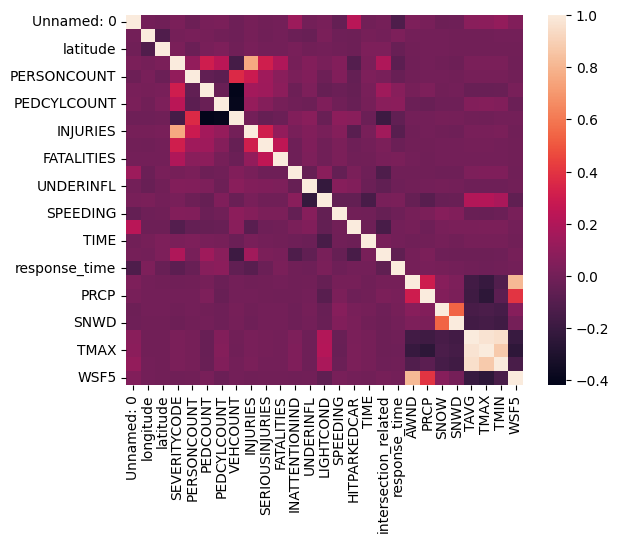

In [ ]:
sns.heatmap(df.corr())

<Axes: xlabel='SEVERITYCODE', ylabel='count'>

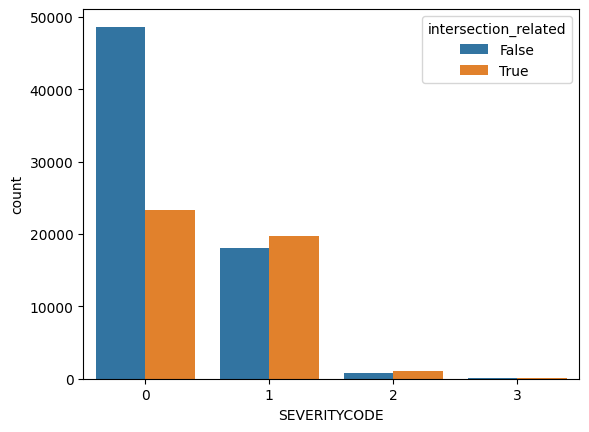

In [ ]:
sns.countplot(x='SEVERITYCODE',data=df,hue='intersection_related')

<Axes: xlabel='SEVERITYCODE', ylabel='COLLISIONTYPE'>

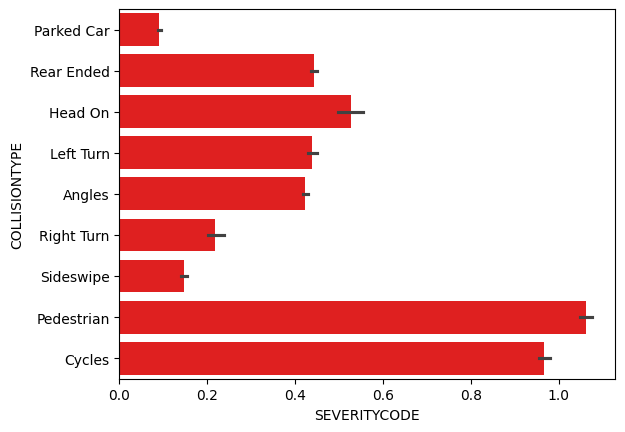

In [ ]:
sns.barplot(x='SEVERITYCODE',y='COLLISIONTYPE',data=df,color='red')

#BOXPLOT AND REMOVAL OF OUTLIERS

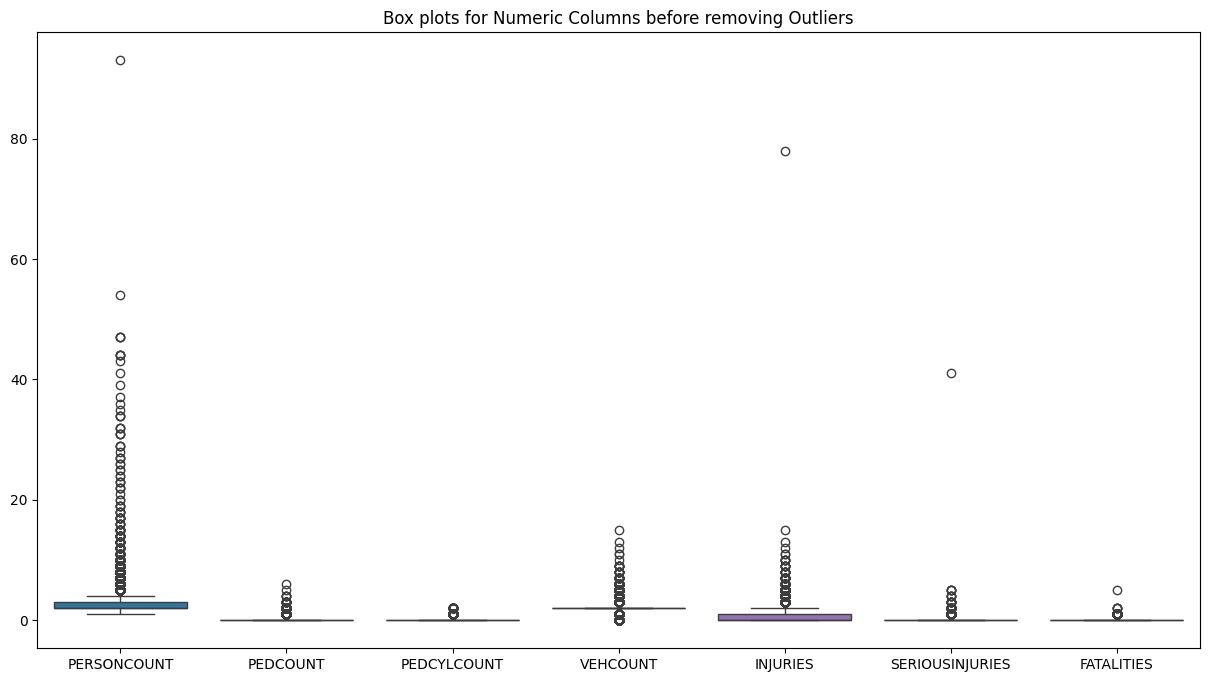

In [ ]:
# Use box plots to visualize outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES']])
plt.title('Box plots for Numeric Columns before removing Outliers')
plt.show()

In [ ]:
print('Before removing outliers:',df.shape)
n_col=['longitude','latitude','SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INJURIES','SERIOUSINJURIES','FATALITIES','LIGHTCOND','AWND','PRCP','SNOW','SNWD','TAVG','TMAX','TMIN','WSF5']
for col in n_col:
  q1,q3=df[col].quantile([0.25,0.75])
  IQR=q3-q1
  max_val=q3+1.5*IQR
  min_val=q1-1.5*IQR
  outliers=df[(df[col]>max_val)|(df[col]<min_val)].index
  df.drop(outliers,axis=0,inplace=True)
print('AFter removing outliers:',df.shape)

Before removing outliers: (111882, 34)
AFter removing outliers: (68478, 34)


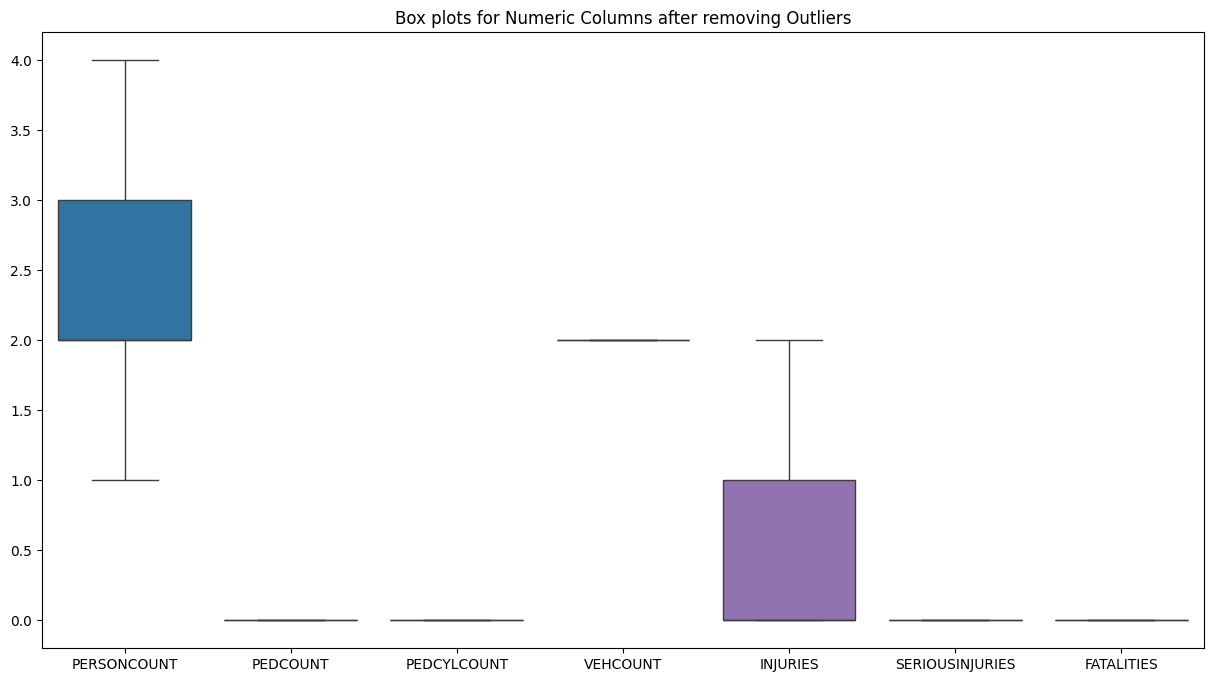

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES']])
plt.title('Box plots for Numeric Columns after removing Outliers')
plt.show()

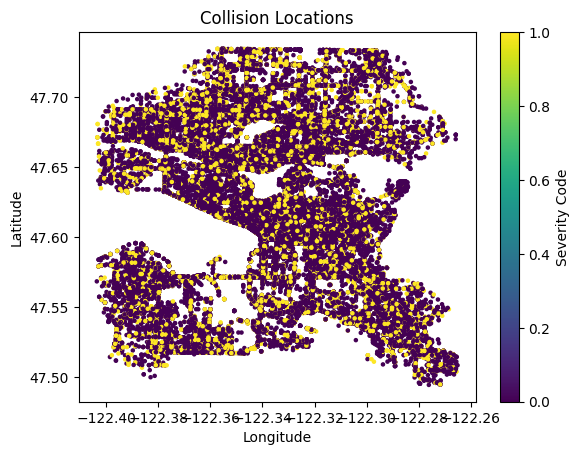

In [ ]:
y=df['SEVERITYCODE']
plt.scatter(df['longitude'], df['latitude'],c=y,cmap='viridis', s=5)     # cmap = 'coolwarm','seismic','magma','cividis'
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Collision Locations')
plt.colorbar(label='Severity Code')
plt.show()

#FILLING MISSING VALUES

In [ ]:
df['intersection_related']=df['intersection_related'].fillna(df['intersection_related'].mode()[0])
df['AWND']=df['AWND'].fillna(df['AWND'].mean())
df['PRCP']=df['PRCP'].fillna(df['PRCP'].mean())
df['SNOW']=df['SNOW'].fillna(df['SNOW'].mean())
df['SNWD']=df['SNWD'].fillna(df['SNWD'].mean())
df['TAVG']=df['TAVG'].fillna(df['TAVG'].mean())
df['TMAX']=df['TMAX'].fillna(df['TMAX'].mean())
df['TMIN']=df['TMIN'].fillna(df['TMIN'].mean())
df['WSF5']=df['WSF5'].fillna(df['WSF5'].mean())

#GET DUMMIES

In [ ]:
df1=pd.get_dummies(df[['COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','intersection_related']],drop_first=True)

In [ ]:
df2=pd.concat([df,df1],axis=1)

#DROP UNWANTED COLUMNS

In [ ]:
df2.drop(['Unnamed: 0','COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','SPDCASENO','DATE','TIME','intersection_related','response_type','response_time'],axis=1,inplace=True)

In [ ]:
df2.isna().sum()

longitude                           0
latitude                            0
SEVERITYCODE                        0
PERSONCOUNT                         0
PEDCOUNT                            0
PEDCYLCOUNT                         0
VEHCOUNT                            0
INJURIES                            0
SERIOUSINJURIES                     0
FATALITIES                          0
INATTENTIONIND                      0
UNDERINFL                           0
LIGHTCOND                           0
SPEEDING                            0
HITPARKEDCAR                        0
AWND                                0
PRCP                                0
SNOW                                0
SNWD                                0
TAVG                                0
TMAX                                0
TMIN                                0
WSF5                                0
COLLISIONTYPE_Cycles                0
COLLISIONTYPE_Head On               0
COLLISIONTYPE_Left Turn             0
COLLISIONTYP

In [ ]:
df2.dtypes

longitude                           float64
latitude                            float64
SEVERITYCODE                          int64
PERSONCOUNT                           int64
PEDCOUNT                              int64
PEDCYLCOUNT                           int64
VEHCOUNT                              int64
INJURIES                              int64
SERIOUSINJURIES                       int64
FATALITIES                            int64
INATTENTIONIND                         bool
UNDERINFL                              bool
LIGHTCOND                             int64
SPEEDING                               bool
HITPARKEDCAR                           bool
AWND                                float64
PRCP                                float64
SNOW                                float64
SNWD                                float64
TAVG                                float64
TMAX                                  int64
TMIN                                  int64
WSF5                            

In [ ]:
df2.shape

(68478, 46)

#TARGET VARIABLES

In [ ]:
x=df2.drop(['SEVERITYCODE'],axis=1)
y=df2['SEVERITYCODE']

#FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
k=40
selector = SelectKBest(f_classif, k=k)
x_selected = selector.fit_transform(x, y)
selected_features = x.columns[selector.get_support()]
print(selected_features)

Index(['longitude', 'latitude', 'PERSONCOUNT', 'INJURIES', 'INATTENTIONIND',
       'UNDERINFL', 'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR', 'AWND', 'PRCP',
       'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WSF5', 'COLLISIONTYPE_Cycles',
       'COLLISIONTYPE_Head On', 'COLLISIONTYPE_Left Turn',
       'COLLISIONTYPE_Parked Car', 'COLLISIONTYPE_Rear Ended',
       'COLLISIONTYPE_Right Turn', 'COLLISIONTYPE_Sideswipe',
       'JUNCTIONTYPE_Driveway Junction', 'JUNCTIONTYPE_Mid-Block',
       'JUNCTIONTYPE_Ramp Junction', 'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke',
       'WEATHER_Overcast', 'WEATHER_Raining', 'WEATHER_Severe Crosswind',
       'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing', 'ROADCOND_Ice',
       'ROADCOND_Oil', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush',
       'ROADCOND_Standing Water', 'ROADCOND_Wet'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 3  4  5  7  8 16 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


#TRAIN AND TEST SPLITTING

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

#NORMALIZATION

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

#MODEL CREATION


*  k-NN
*   Naive Bayes
*   SVM


  





In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import  confusion_matrix,accuracy_score,classification_report
KNN_model=KNeighborsClassifier(n_neighbors=5,weights='uniform')
NB_model=BernoulliNB()
SVM_model=SVC()
lst_models=[KNN_model,NB_model,SVM_model]

# EVALUATION OF MODELS

In [ ]:
for i in lst_models:
  print('Model Name:',i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('Confusion Matrix:')
  print(confusion_matrix(y_test,y_pred))
  print('Accuracy Score:',accuracy_score(y_test,y_pred))
  print('Classification Report:')
  print(classification_report(y_test,y_pred))
  print('-'*100)

Model Name: KNeighborsClassifier()
Confusion Matrix:
[[15353    38]
 [  562  4591]]
Accuracy Score: 0.9707943925233645
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     15391
           1       0.99      0.89      0.94      5153

    accuracy                           0.97     20544
   macro avg       0.98      0.94      0.96     20544
weighted avg       0.97      0.97      0.97     20544

----------------------------------------------------------------------------------------------------
Model Name: BernoulliNB()
Confusion Matrix:
[[15391     0]
 [    0  5153]]
Accuracy Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15391
           1       1.00      1.00      1.00      5153

    accuracy                           1.00     20544
   macro avg       1.00      1.00      1.00     20544
weighted avg       1.00      1.00      1

#DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=42)
dt.fit(x_train,y_train)
y_pred1=dt.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred1))
print('Classification Report:')
print(classification_report(y_test,y_pred1))

Accuracy Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15391
           1       1.00      1.00      1.00      5153

    accuracy                           1.00     20544
   macro avg       1.00      1.00      1.00     20544
weighted avg       1.00      1.00      1.00     20544



[Text(0.5, 0.75, 'PEDCOUNT <= 0.326\nentropy = 0.822\nsamples = 47934\nvalue = [35628, 12306]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 35628\nvalue = [35628, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 12306\nvalue = [0, 12306]')]

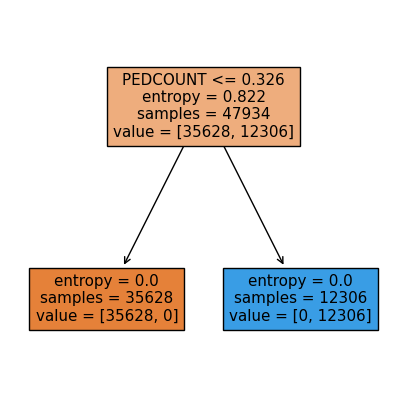

In [ ]:
from sklearn import tree
plt.figure(figsize=(5,5))
tree.plot_tree(dt,feature_names=['Unnamed: 0', 'longitude', 'latitude', 'SEVERITYCODE', 'COLLISIONTYPE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES','SERIOUSINJURIES', 'FATALITIES', 'JUNCTIONTYPE', 'INATTENTIONIND','UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING','HITPARKEDCAR', 'SPDCASENO', 'DATE', 'TIME', 'intersection_related','response_type', 'response_time', 'AWND', 'PRCP', 'SNOW', 'SNWD','TAVG', 'TMAX', 'TMIN', 'WSF5'],filled=True)

#RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion='entropy')
rf.fit(x_train,y_train)
y_pred2=rf.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred2))
print('Classification Report:')
print(classification_report(y_test,y_pred2))

Accuracy Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15391
           1       1.00      1.00      1.00      5153

    accuracy                           1.00     20544
   macro avg       1.00      1.00      1.00     20544
weighted avg       1.00      1.00      1.00     20544

